In [1]:
#IPython notebook plot formatting
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats
import nltk

#Load the modules
import Extractors as e
import Classifiers as c
import DoyleMLToolkit as dmlt

#Make sure they get reloaded after changes
e = reload(e)
c = reload(c)
dmlt = reload(dmlt)

import warnings
warnings.filterwarnings('ignore')

e.All = e.All[:2]
c.All = [c.NaiveBayesReal,c.KNearestNeighbors]

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Define data sets

colors = ["red","green","blue","orange","purple"]

keys = ["CC","CD","DT","EX","FW","IN","JJ","JJR","JJS","LS","MD","NN","NNS","NNP","NNPS","PDT","POS","PRP",
        "PRP","RB","RBR","RBS","RP","SYM","TO","UH","VB","VBD","VBG","VBN","VBP","VBZ","WDT","WP","WP$","WRB"]

classes = [
    "CHR_OCC", #0: Character or occupation
    "ORG_IDN", #1: Origin or identity
    "MAG",     #2: Worth, usefulness, force, importance
    "REA_PUR", #3: Reason or purpose
    "WHICH"    #4: Clarification (which one)
]

what_sentences = [
   "What did Albert Einstein do?",
   "What does the president do?",
    "What was the name of the Beatles' first drummer?",
    "What is the definition of parsimonious?",
    "What is the square root of 17?",
    "What is the device connected on video1?",
#    "What is the wait time at Hopdoddy right now?",
    "What does a router do?",
    "What do you do with a drunken sailor?",
    "What is the point of putting eggs in a cake?",
    "What time is it?",
    "What day am I flying to Kansas?",
    "What year did Obama get elected?"
]

classifications = [
    "CHR_OCC",
    "CHR_OCC",
    "ORG_IDN",
    "ORG_IDN",
    "ORG_IDN",
    "ORG_IDN",
#    "MAG",
    "REA_PUR",
    "REA_PUR",
    "REA_PUR",
    "WHICH",
    "WHICH",
    "WHICH"
]

m = 1000
datasets = []
for j in range(len(what_sentences)):
    sentence = what_sentences[j][:-1]
    tokens = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokens[1:])

    yy = []
    tagged_ = np.asarray(tagged)[:,1]
    for i in range(1,len(tagged_)):
        yy += np.linspace(keys.index(tagged_[i-1]),keys.index(tagged_[i]),m/(len(tagged_)-1)).tolist()
    y = [yy[-1]]*m
    y[:len(yy)] = yy
    datasets.append(y)
    x = np.linspace(0,m,m)
data_sets = [datasets]

#classifications = (["1"]*10)+(["2"]*10)+(["3"]*10)
#data_sets = [[(np.linspace(0,2*int(i/10),m)+(int(i/10)*100)+(i)).tolist() for i in range(30)]]

In [3]:
#Define some important variables

order = 4
zeroth = 0
n = 2

In [4]:
#Create classifiers for real data

positive = "ORG_IDN"

n_dt = 1 #Number of data sets
n_ex = 2 #Number of extractors
n_cl = 2 #Number of classifiers

Models = []
for i in c.All:
    for j in e.All:
        Models.append(dmlt.Model(j,i,order,zeroth))

#For each model, load a seperate Token for each data set
Data = []
for model in Models:
    Data.append(model.load(classifications,data_sets))

for token in Data:
    token.genVariances(order,0,zeroth)

In [5]:
#Test model
for model in range(len(Data)):
    print Models[model].name[0]
    print Models[model].name[1]
    Models[model].train(Data[model],[],True,False)
    results = Models[model].test(Data[model],positive,True,True)
    print results[:4]
    print ''

ComplexFourier
Naive Bayes Real
0 ('CHR_OCC', 0.0)
1 ('CHR_OCC', 0.0)
2 ('ORG_IDN', 0.9447358812652319)
3 ('ORG_IDN', 0.9109452456023801)
4 ('ORG_IDN', 0.9725405702930741)
5 ('ORG_IDN', 0.0)
6 ('REA_PUR', 0.019893548188728707)
7 ('REA_PUR', 0.7151633288933115)
8 ('REA_PUR', 2.0959512551455508e-13)
9 ('WHICH', 0.9999998088849034)
10 ('WHICH', 0.9999999263641888)
11 ('WHICH', 5.883221718442921e-231)
3 5
1 3
[0.5, 0.375, 0.75, 0.5]

Bernstein
Naive Bayes Real
0 ('CHR_OCC', 0.0)
1 ('CHR_OCC', 0.0)
2 ('ORG_IDN', 0.0)
3 ('ORG_IDN', 0.6216713500089186)
4 ('ORG_IDN', 0.5981100205863518)
5 ('ORG_IDN', 0.5981100205863518)
6 ('REA_PUR', 0.31097627975431624)
7 ('REA_PUR', 0.0)
8 ('REA_PUR', 0.5110791424340423)
9 ('WHICH', 0.0)
10 ('WHICH', 1.0)
11 ('WHICH', 1.0)
3 5
1 3
[0.5, 0.375, 0.75, 0.5]

ComplexFourier
K Nearest Neighbors
0 ('CHR_OCC', 0.3333333333333333)
1 ('CHR_OCC', 0.3333333333333333)
2 ('ORG_IDN', 0.6666666666666666)
3 ('ORG_IDN', 0.6666666666666666)
4 ('ORG_IDN', 0.6666666666666666)
5

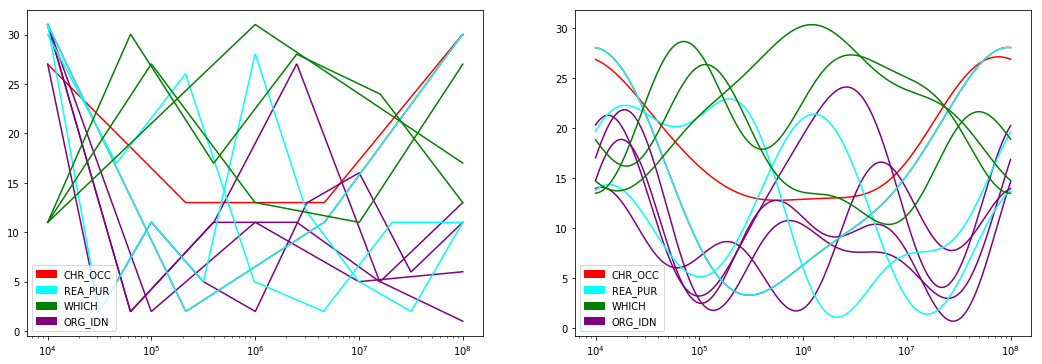

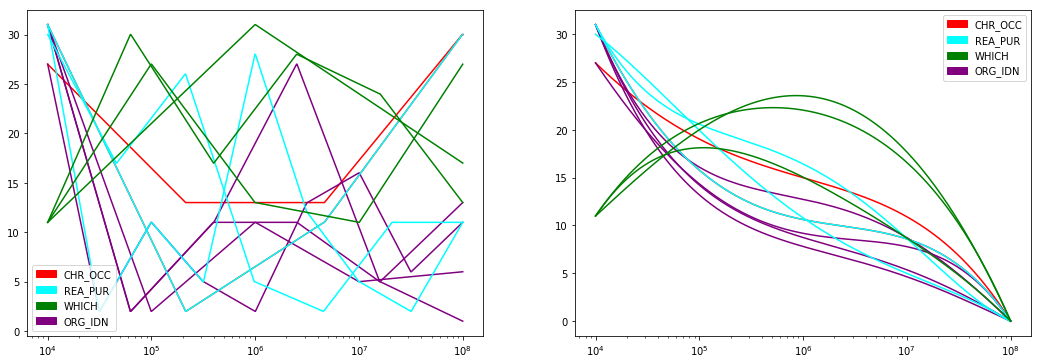

In [6]:
##### Reconstructed plots
pylab.rcParams['figure.figsize'] = (18, 6)

for i in range(n_ex):
    plt.subplot(121)
    plt.xscale("log")
    Models[i].plotSamples(Data[i],0)

    plt.subplot(122)
    plt.xscale("log")
    Models[i].plotApproximations(Data[i],0,True)

    plt.show()